1. Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis
based on a given set of training data samples.  

In [ ]:
import csv
a = []
with open('enjoysport.csv', 'r') as csvfile:
    for row in csv.reader(csvfile):
        a.append(row)

print(a)
print("\n The total number of training instances are : ",len(a))
num_attribute = len(a[0])-1
print("\n The initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("\n The hypothesis for the training instance {} is :\n" .format(i+1),hypothesis)

print("\n The Maximally specific hypothesis for the training instance is ")
print(hypothesis)

[['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

 The total number of training instances are :  5

 The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 2 is :
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The hypothesis for the training instance 3 is :
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 5 is :
 ['sunny', 'warm', '?', 'strong', '?', '?']

 The Maximally specific hypothesis for the training instance is 
['sunny', 'warm', '?', 'strong', '?', '?']


2. For a given set of training data examples stored in a .CSV file, implement and demonstrate the
Candidate-Elimination algorithm in python to output a description of the set of all hypotheses
consistent with the training examples

In [ ]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in
                range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

            print(specific_h)
            print(general_h)
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
            print(" steps of Candidate Elimination Algorithm",i+1)
            print(specific_h)
            print(general_h)
    indices = [i for i, val in enumerate(general_h) if val ==['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' '?' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
 steps of Ca

3. Demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set
for building the decision tree and apply this knowledge to classify a new sample.

In [ ]:
import pandas as pd
import numpy as np
import math

# Define a class for the decision tree node
class DecisionTreeNode:
    def __init__(self, attribute=None, label=None, branches={}):
        self.attribute = attribute  # the attribute used to split the data
        self.label = label  # the label assigned to this node
        self.branches = branches  # the branches of the decision tree

# Define a function to calculate the entropy of a dataset
def entropy(data):
    target = data['target']
    n = len(target)
    unique, counts = np.unique(target, return_counts=True)
    entropy = 0
    for i in range(len(unique)):
        p = counts[i] / n
        entropy -= p * math.log2(p)
    return entropy

# Define a function to calculate the information gain of an attribute
def information_gain(data, attribute):
    n = len(data)
    values = data[attribute].unique()
    entropy_s = entropy(data)
    entropy_attr = 0
    for value in values:
        subset = data[data[attribute] == value]
        subset_n = len(subset)
        subset_entropy = entropy(subset)
        entropy_attr += subset_n / n * subset_entropy
    return entropy_s - entropy_attr

# Define the ID3 algorithm
def id3(data, attributes):
    target = data['target']
    # If all the examples have the same target value, return a leaf node with that value
    if len(target.unique()) == 1:
        return DecisionTreeNode(label=target.iloc[0])
    # If there are no attributes left to split on, return a leaf node with the most common target value
    if len(attributes) == 0:
        return DecisionTreeNode(label=target.value_counts().idxmax())
    # Otherwise, select the attribute with the highest information gain
    gains = {attr: information_gain(data, attr) for attr in attributes}
    best_attribute = max(gains, key=gains.get)
    # Create a new decision tree node with the selected attribute
    node = DecisionTreeNode(attribute=best_attribute)
    # Split the data based on the selected attribute and recursively build the tree
    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value].drop(best_attribute, axis=1)
        if len(subset) == 0:
            node.branches[value] = DecisionTreeNode(label=target.value_counts().idxmax())
        else:
            new_attributes = attributes.copy()
            new_attributes.remove(best_attribute)
            node.branches[value] = id3(subset, new_attributes)
    return node

# Load the dataset
data = pd.read_csv('play_tennis.csv')
# Split the dataset into attributes and target variable
attributes = data.columns[:-1].tolist()
# Build the decision tree using ID3 algorithm
root = id3(data, attributes)

# Define a function to classify a new sample using the decision tree
def classify(sample, tree):
    if tree.label is not None:
        return tree.label
    attribute = tree.attribute
    value = sample[attribute]
    if value not in tree.branches:
        # Handle cases where the sample value is not in the training data branches
        # For simplicity, return the most common label in the training data
        return data['target'].value_counts().idxmax()
    subtree = tree.branches[value]
    return classify(sample, subtree)

# Example usage: Classify a new sample
new_sample = {'outlook': 'sunny', 'temp': 'cool', 'humidity': 'normal', 'wind': 'strong'}
classification = classify(new_sample, root)
print(f"The classification for the new sample is: {classification}")

The classification for the new sample is: no


4. Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [ ]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad

    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr

    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.80264225]
 [0.78427885]
 [0.79758348]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.80405299]
 [0.78565572]
 [0.79900768]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.80542899]
 [0.78699956]
 [0.80039701]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.80677149]
 [0.78831154]
 [0.801

5.Write a program for Implementation of K-Nearest Neighbours (K-NN) in Python


In [ ]:
from math import sqrt
from statistics import mode
l=[[33.6,50,1],[26.6,30,0],[23.4,40,0],[43.1,67,0],[35.3,23,1],[35.9,67,1],[36.7,45,1],[25.7,46,0],[23.3,29,0],[31,56,1]]
n=[43.6,40]
k=3
m=[]
x=[]
for i in l:
    a=0
    for j in range(len(n)): # Corrected range to include the last element of n
        a+= (i[j]-n[j])*(i[j]-n[j])
    m.append(sqrt(a)) # Append after calculating the sum of squares for each data point
a=sorted(m)
for i in range(k):
    x.append(m.index(a[i]))
y=[]
for i in x:
    print(l[i])
    y.append(l[i][-1])
print()
print("result -->",mode(y))

[36.7, 45, 1]
[33.6, 50, 1]
[25.7, 46, 0]

result --> 1


6. Write a program to implement Naïve Bayes algorithm in python and to display the results using confusion matrix and accuracy.

In [ ]:
# import required libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# load iris dataset
iris = load_iris()

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# create Naive Bayes classifier
classifier = GaussianNB()

# train the classifier using the training data
classifier.fit(X_train, y_train)

# predict the target values for the testing data
y_pred = classifier.predict(X_test)

# display confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)


Confusion Matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy Score: 1.0


7. Write a program to implement Logistic Regression (LR) algorithm in python

Coefficients:  [[1.97026731]]
Intercept:  [1.20847145]


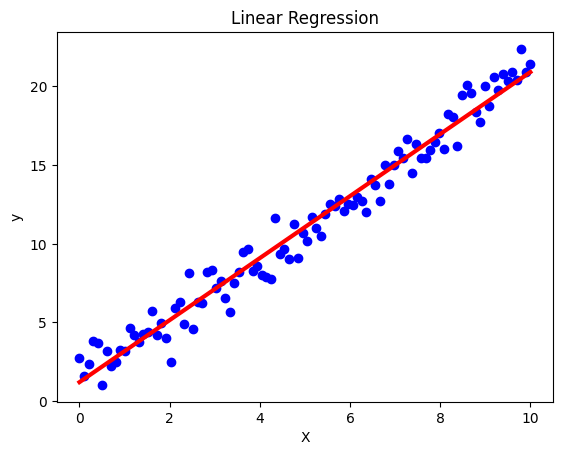

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Create linear regression object
lr_model = LinearRegression()

# Train the model using the training sets
lr_model.fit(X, y)

# Print the coefficients
print('Coefficients: ', lr_model.coef_)
print('Intercept: ', lr_model.intercept_)

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, lr_model.predict(X), color='red', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


8. Write a program to implement Linear Regression (LR) algorithm in python

[1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1]


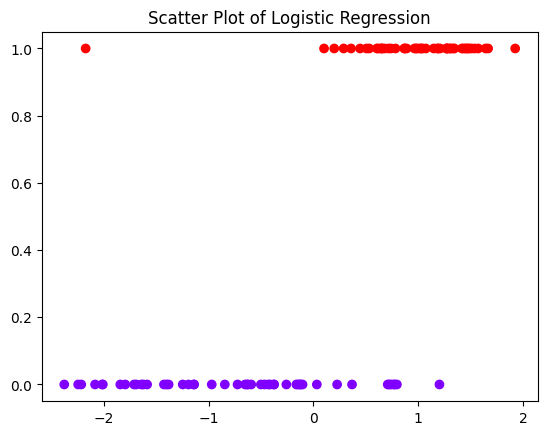

array([[ 9,  2],
       [ 0, 14]])

In [ ]:
# Step 1: Import the required modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Step 2: Generate the dataset
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print(y)

# Step 3: visualize the data
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

# Step 4: Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

x_train.shape

# Step 4: Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Step 5: Make prediction using the model
y_pred = log_reg.predict(x_test)

# Step 6: Display the Confusion Matrix
confusion_matrix(y_test, y_pred)

9. Compare Linear and Polynomial Regression using Python



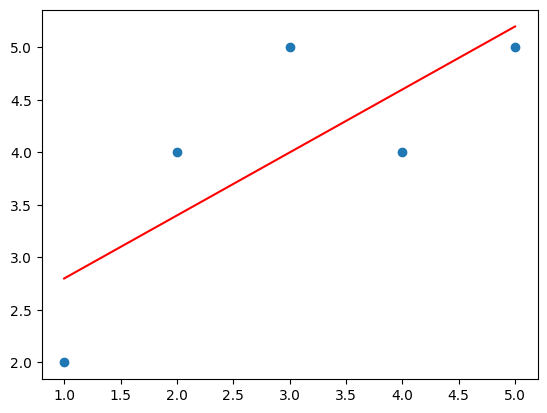

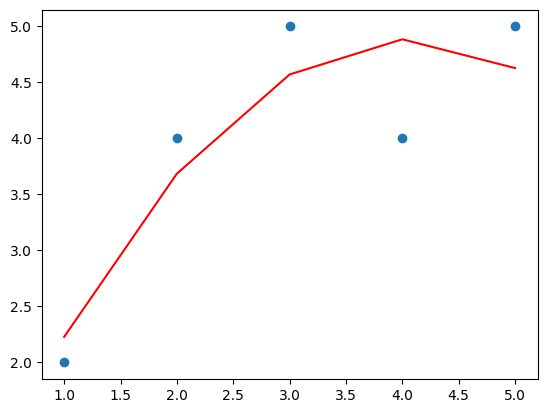

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create some sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5]).reshape(-1, 1)

# Create a linear regression object and fit the data
reg = LinearRegression().fit(X, y)

# Predict new values
X_new = np.array([6]).reshape(-1, 1)
y_pred = reg.predict(X_new)

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.show()

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Create some sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5]).reshape(-1, 1)

# Transform the data to include another axis
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create a polynomial regression object and fit the data
reg = LinearRegression().fit(X_poly, y)

# Predict new values
X_new = np.array([6]).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = reg.predict(X_new_poly)

# Plot the data and the polynomial regression curve
plt.scatter(X, y)
plt.plot(X, reg.predict(X_poly), color='red')
plt.show()


10. Write a Python Program to Implement Expectation & Maximization Algorithm

In [ ]:
import numpy as np
from scipy.stats import norm

# Define the data
data = np.array([1.2, 2.3, 0.7, 1.6, 1.1, 1.8, 0.9, 2.2])

# Initialize the parameters
mu1 = 0
mu2 = 1
sigma1 = 1
sigma2 = 1
p1 = 0.5
p2 = 0.5

# Run the EM algorithm
for i in range(10):
    # E-step
    likelihood1 = norm.pdf(data, mu1, sigma1)
    likelihood2 = norm.pdf(data, mu2, sigma2)
    weight1 = p1 * likelihood1 / (p1 * likelihood1 + p2 * likelihood2)
    weight2 = p2 * likelihood2 / (p1 * likelihood1 + p2 * likelihood2)

    # M-step
    mu1 = np.sum(weight1 * data) / np.sum(weight1)
    mu2 = np.sum(weight2 * data) / np.sum(weight2)
    sigma1 = np.sqrt(np.sum(weight1 * (data - mu1)**2) / np.sum(weight1))
    sigma2 = np.sqrt(np.sum(weight2 * (data - mu2)**2) / np.sum(weight2))
    p1 = np.mean(weight1)
    p2 = np.mean(weight2)

# Print the final estimates of the parameters
print("mu1:", mu1)
print("mu2:", mu2)
print("sigma1:", sigma1)
print("sigma2:", sigma2)
print("p1:", p1)
print("p2:", p2)

mu1: 0.9545902456963998
mu2: 1.7595212637782114
sigma1: 0.19986282179149245
sigma2: 0.47713642731204714
p1: 0.3534728534331289
p2: 0.6465271465668712


11. Write a program for the task of Credit Score Classification

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("CREDITSCORE.csv")
print(data.head())
print(data.info())

# Encode 'Credit_Mix' column
le_credit_mix = LabelEncoder()
data['Credit_Mix_Encoded'] = le_credit_mix.fit_transform(data['Credit_Mix'])

# Encode 'Credit_Score' target variable
le_credit_score = LabelEncoder()
data['Credit_Score_Encoded'] = le_credit_score.fit_transform(data['Credit_Score'])


from sklearn.model_selection import train_test_split
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix_Encoded", "Outstanding_Debt", # Use encoded column
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(data[["Credit_Score_Encoded"]]) # Use encoded target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

# Flatten ytrain to be 1D array
ytrain = ytrain.ravel()


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

# Provide input directly here
a = 700000     # Annual Income
b = 58000      # Monthly Inhand Salary
c = 4          # Number of Bank Accounts
d = 3          # Number of Credit Cards
e = 11.5       # Interest Rate
f = 2          # Number of Loans
g = 8          # Delay from due date
h = 2          # Number of delayed payments
i = 'Standard' # Credit Mix (Bad, Standard, Good)
j = 150000     # Outstanding Debt
k = 15         # Credit History Age (years)
l = 20000      # Monthly Balance

# Encode the input 'Credit_Mix'
i_encoded = le_credit_mix.transform([i])[0]


features = np.array([[a, b, c, d, e, f, g, h, i_encoded, j, k, l]])
predicted_score_encoded = model.predict(features)

# Decode the predicted credit score
predicted_score = le_credit_score.inverse_transform(predicted_score_encoded)

print("Predicted Credit Score = ", predicted_score[0])

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


12. Implement Iris Flower Classification using KNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("IRIS.csv")
print(iris.head())
print()
print(iris.describe())
print("Target Labels", iris["species"].unique())

import plotly.io as io
import plotly.express as px
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
fig.show()
x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

x_new = np.array([[6, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Target Labels ['Iris-setosa' 'Iris-versicolor

Prediction: ['Iris-setosa']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



13. Implement the Car Price Prediction Model using Python


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

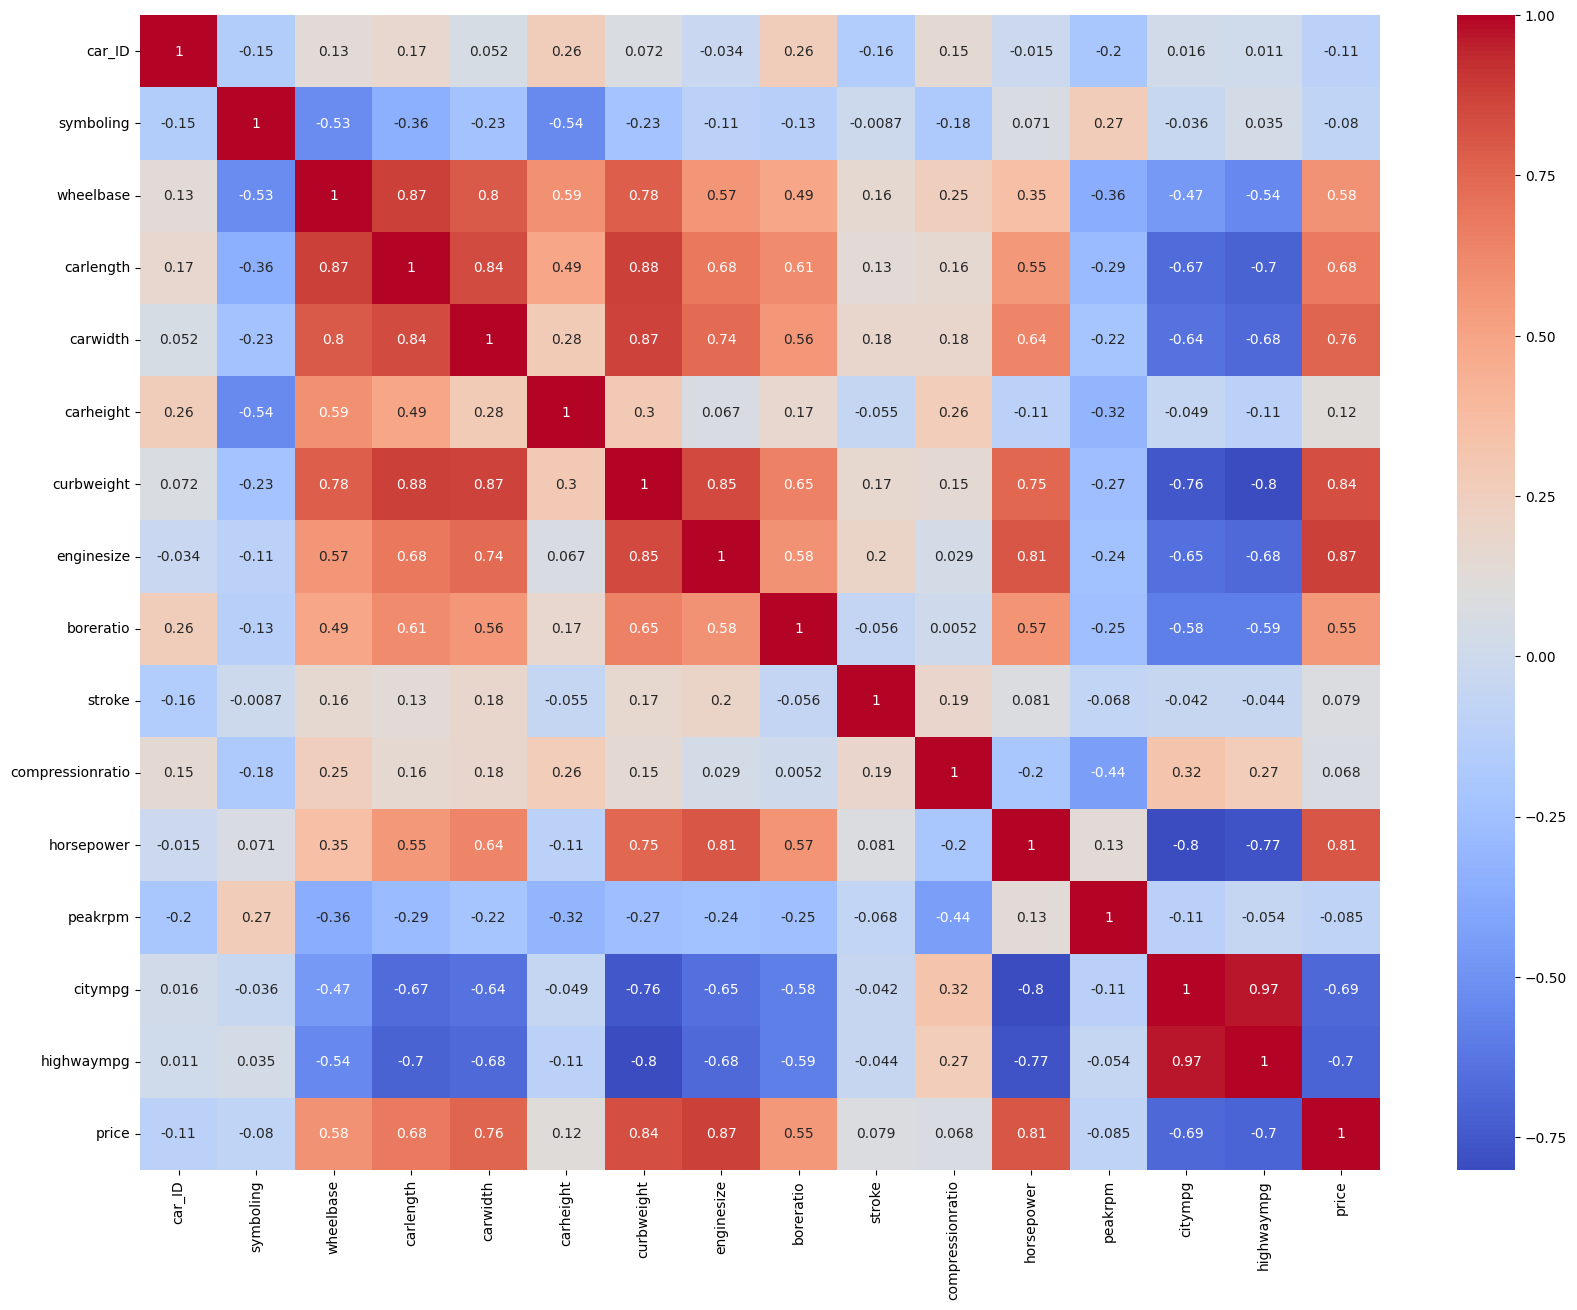

1.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Importing the dataset
data = pd.read_csv("CarPrice.csv")

#Data Exploration
data.head()
data.shape
data.isnull().sum() #Checking if the dataset has NULL Values
data.info()
data.describe()
data.CarName.unique()

#Analysing correlations & using heatmap
print(data.corr(numeric_only=True))
plt.figure(figsize=(20, 15))
correlations = data.corr(numeric_only=True)
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

#Training a Car Price Prediction Model
predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
                          "enginesize", "boreratio", "stroke",
                                       "compressionratio", "horsepower", "peakrpm",
                                                    "citympg", "highwaympg", "price"]]
x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

14. Implement House price Prediction using appropriate machine learning algorithm


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Categorical variables: 4
Integer variables: 6
Float variables: 3
Categorical variables:
['MSZoning', 'LotConfig

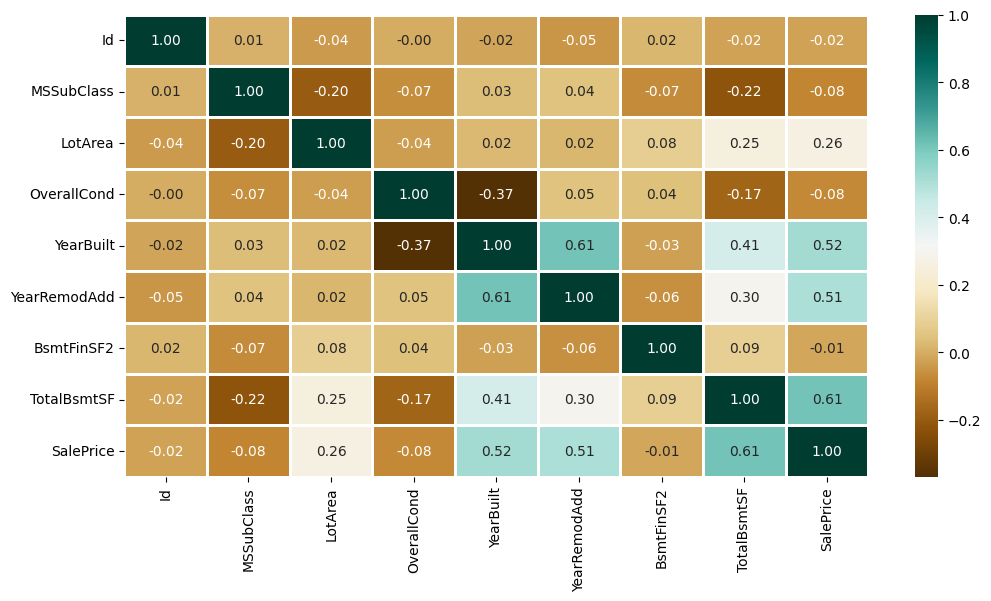

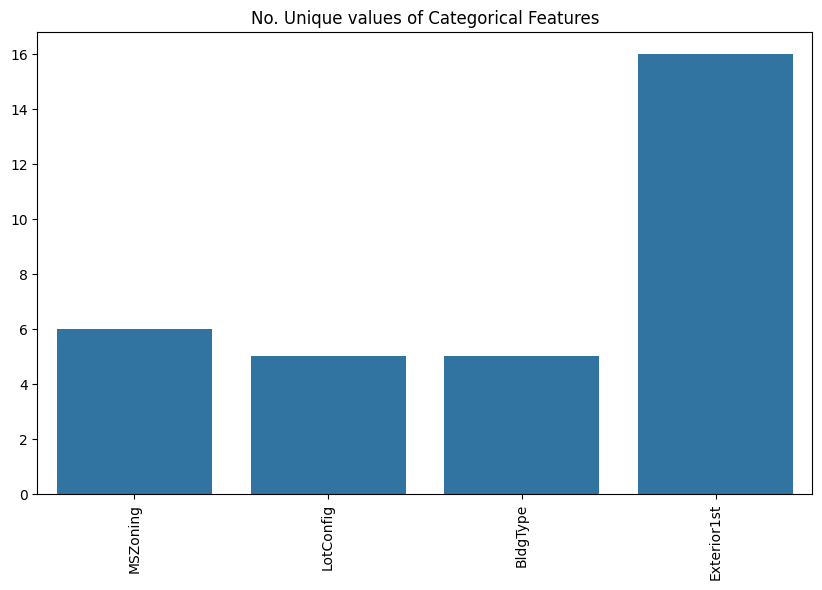

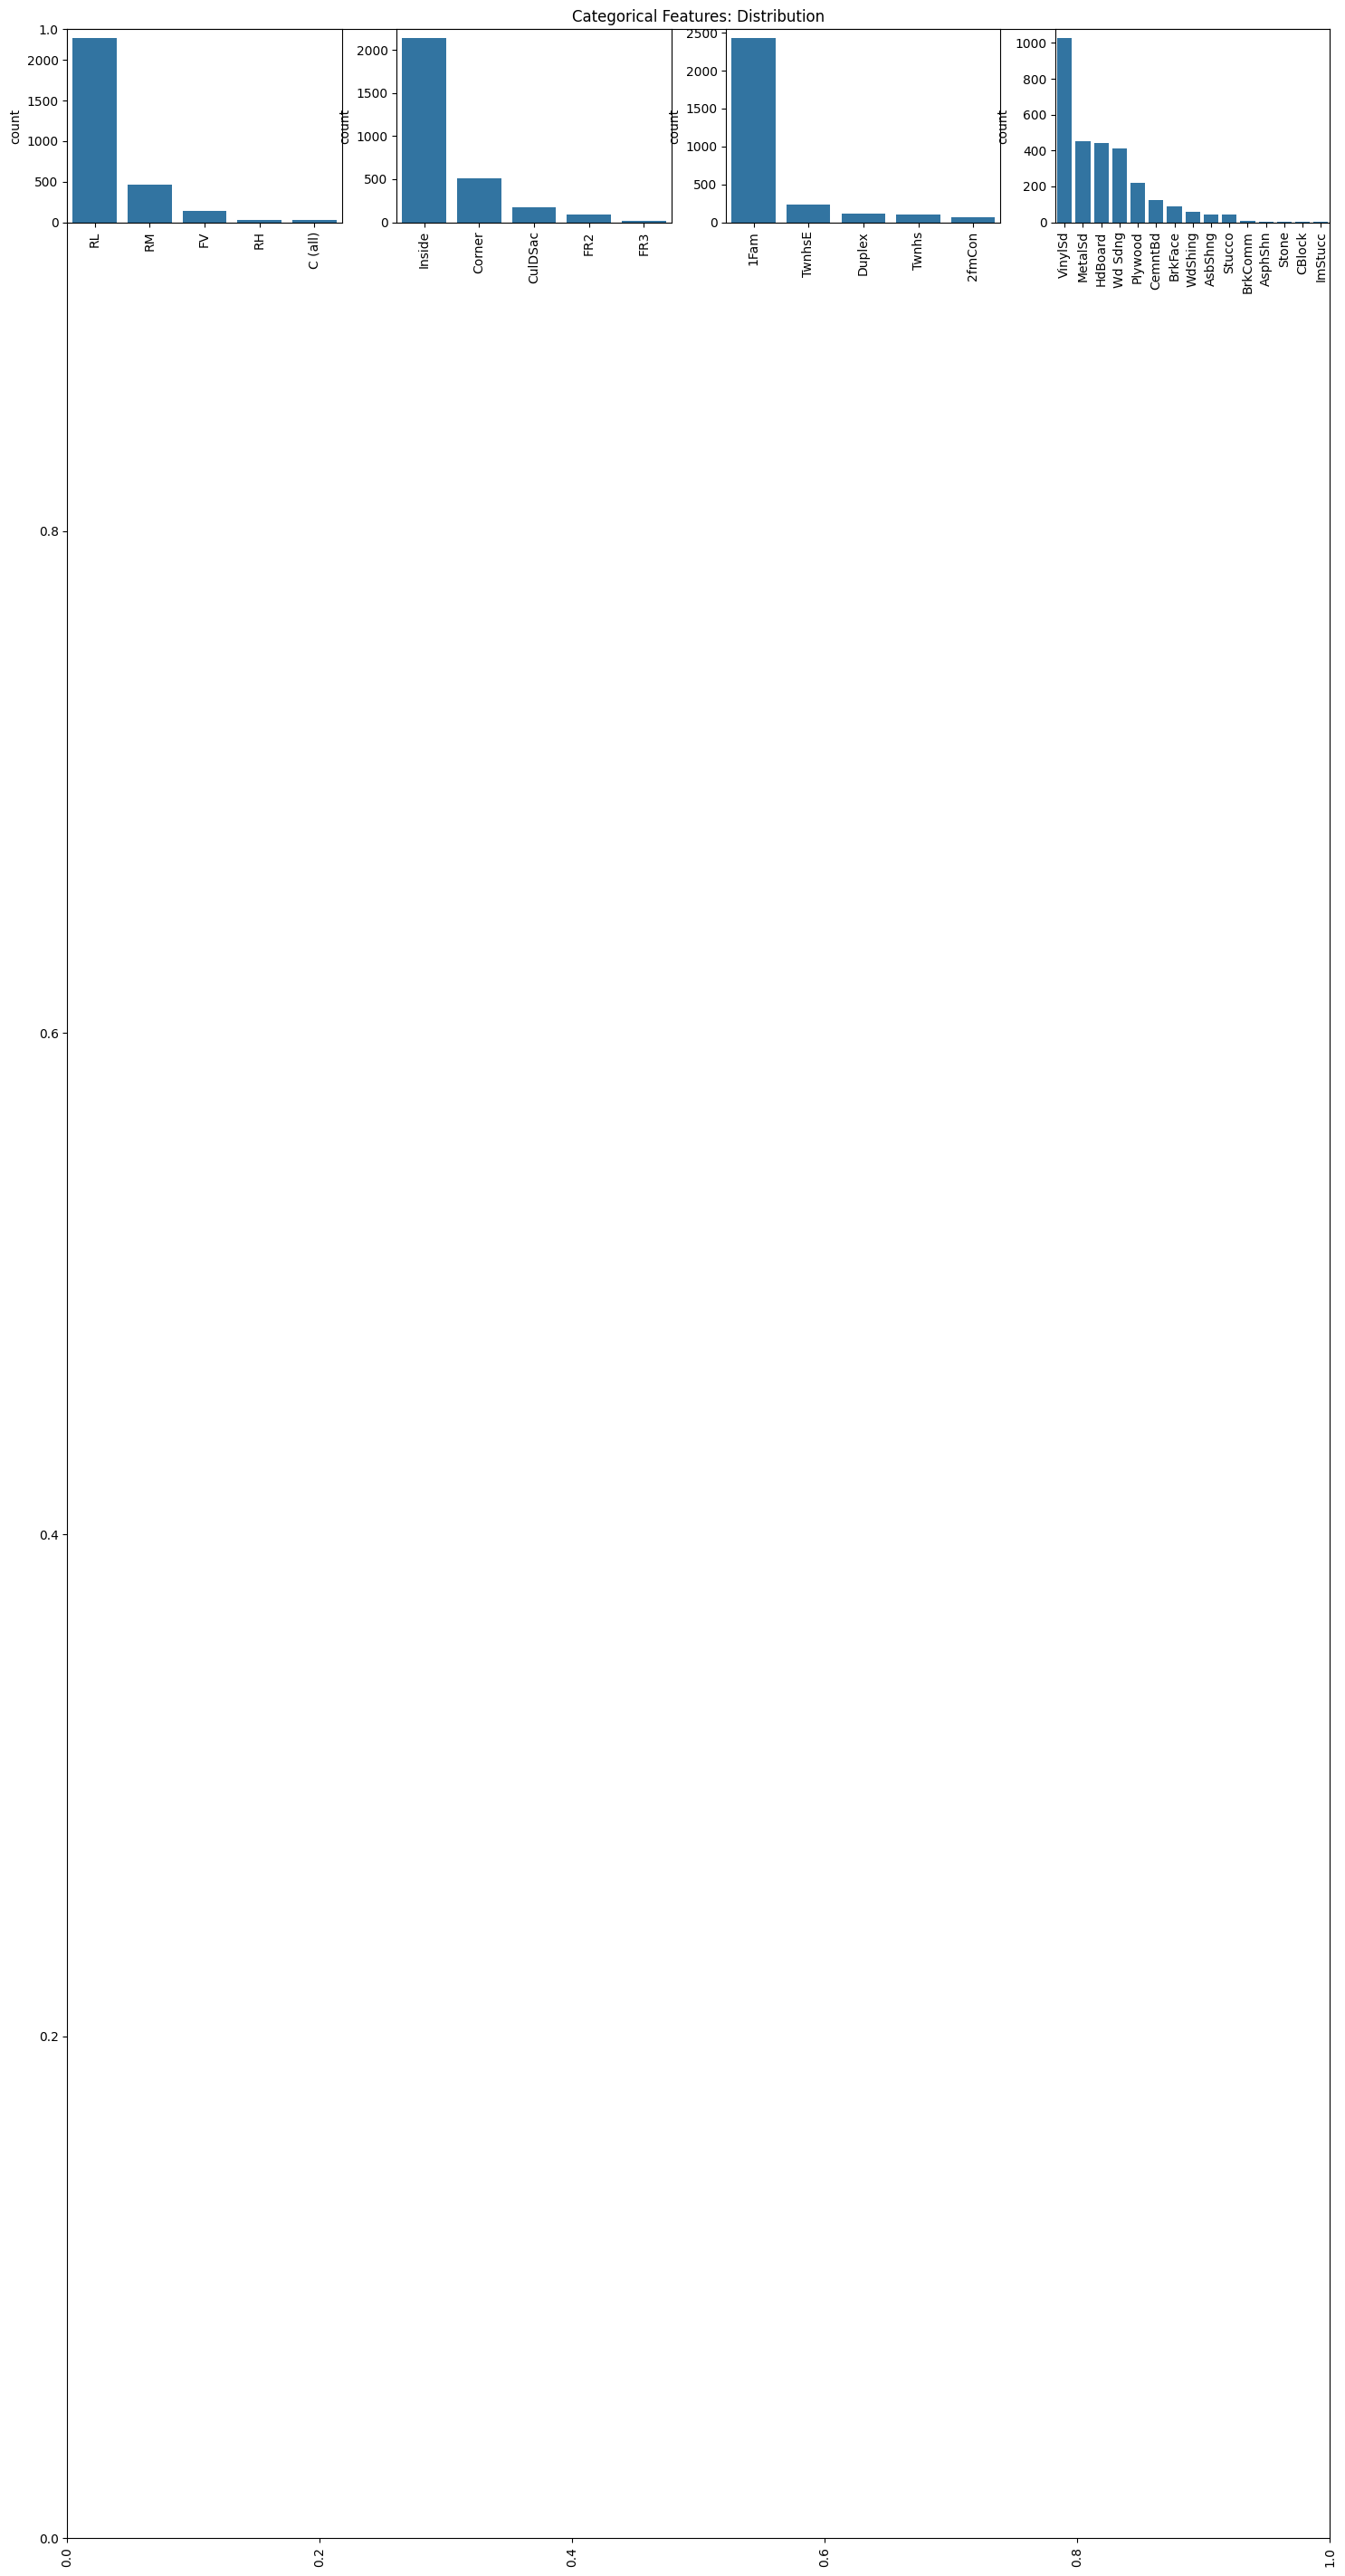

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Dataset
dataset = pd.read_csv("HousePricePrediction.csv")
#Exploring dataset
print(dataset.head(5))
dataset.shape
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(numeric_only=True),
            cmap = 'BrBG',
                        fmt = '.2f',
                                    linewidths = 2,
                                                annot = True)

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1
dataset.drop(['Id'],axis=1,inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

from sklearn.preprocessing import OneHotEncoder
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
# model_SVR.fit(X_train,Y_train)
# Y_pred = model_SVR.predict(X_valid)

# print(mean_absolute_percentage_error(Y_valid, Y_pred))

#LinearRegression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

15. Implement Iris Flower Classification using Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
#Load the iris dataset
iris = datasets.load_iris()
#GaussianNB and MultinomialNB Models
gnb = GaussianNB()
mnb = MultinomialNB()
#Train both GaussianNB and MultinomialNB Models and print their confusion matrices
y_pred_gnb = gnb.fit(iris.data, iris.target).predict(iris.data)
cnf_matrix_gnb = confusion_matrix(iris.target, y_pred_gnb)
print("Confusion Matrix of GNB \n",cnf_matrix_gnb)

y_pred_mnb = mnb.fit(iris.data, iris.target).predict(iris.data)
cnf_matrix_mnb = confusion_matrix(iris.target, y_pred_mnb)
print("Confusion Matrix of MNB \n",cnf_matrix_mnb)


Confusion Matrix of GNB 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Confusion Matrix of MNB 
 [[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


16. Compare different types Classification Algorithms and evaluate their performance.

In [ ]:
import numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris # Import load_iris

# Load the iris dataset from sklearn
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Use a test_size

decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
#svm_classifier = SVC() # Not used in the score comparison
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)
logisticregression.fit(x_train, y_train)
passiveAggressive.fit(x_train, y_train)
bernoulli_naiveBayes.fit(x_train, y_train) # Fit the BernoulliNB model

data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier",
                                       "Logistic Regression", "Passive Aggressive Classifier", "Bernoulli Naive Bayes"], # Add Bernoulli Naive Bayes to the list
                                             "Score": [knearestclassifier.score(x_test,y_test), # Evaluate on the test set
                                                       decisiontree.score(x_test, y_test), # Evaluate on the test set
                                                       logisticregression.score(x_test, y_test), # Evaluate on the test set
                                                       passiveAggressive.score(x_test,y_test), # Evaluate on the test set
                                                       bernoulli_naiveBayes.score(x_test, y_test)]} # Evaluate on the test set
score = pd.DataFrame(data1)
print(score) # Print the score DataFrame

       Classification Algorithms     Score
0                 KNN Classifier  1.000000
1       Decision Tree Classifier  1.000000
2            Logistic Regression  1.000000
3  Passive Aggressive Classifier  0.833333
4          Bernoulli Naive Bayes  0.300000


17. Implement Mobile Price Prediction using appropriate machine learning algorithm

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

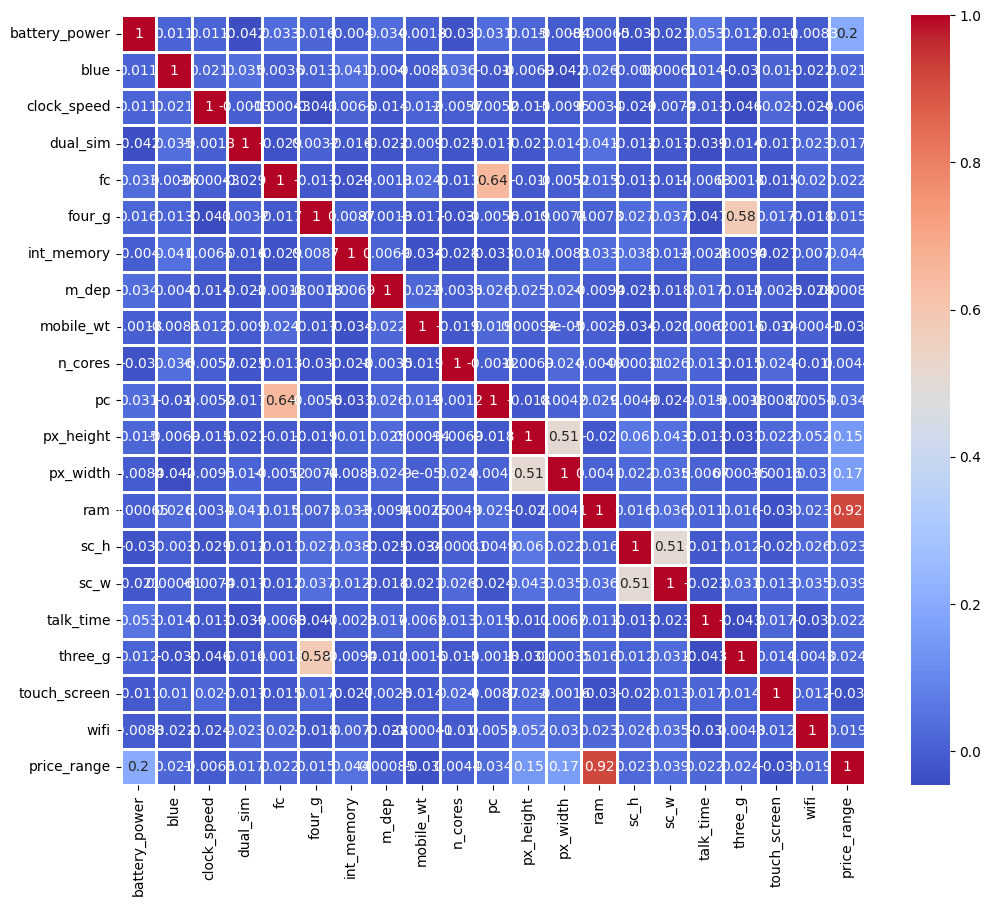

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#importing dataset
data = pd.read_csv("mobile_prices.csv")
print(data.head())
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

#data preparation
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Logistic Regression algorithm provided by Scikit-learn:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
#accuracy of the model:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

#predictions made by the model:
print(y_pred)

(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts)).T
print(price_range)

18. Implement Perceptron based IRIS classification

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978


19. Implementation of Naive Bayes classification for Bank Loan prediction


In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("breastcancer.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[99  8]
 [ 2 62]]


0.9415204678362573

20. Implement Future Sales Prediction using a suitable machine learning algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.io as io
# io.renderers.default='browser' # Comment out or remove this line

data = pd.read_csv("futuresale prediction.csv")
print(data.head())
print(data.sample(5))
print(data.isnull().sum())

import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show("notebook") # Display the figure in the notebook

figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show("notebook") # Display the figure in the notebook

figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show("notebook") # Display the figure in the notebook

correlation = data.corr(numeric_only=True)
print(correlation["Sales"].sort_values(ascending=False))
x = np.array(data.drop(["Sales"], axis=1))
y = np.array(data["Sales"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,   test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))